<div style="width:100%; height:60px; background-color:aqua; display:flex">
<div style="display:flex; flex-direction:row; justify-content:center">
<h2 style="color:white"><strong>Logistic Regression (Multiclass Classification)</strong></h2>
</div>
</div>
<h3 style="color:white">Classifications are used when predicted value is categorical.</h3>
<h3 style="color:white">Multiclass Classification is a type of classification which can have more than two possible outcomes.</h3>
<div style="width:100%; height:auto; display:flex; flex-direction:row; justify-content:space-around;">
<img style="width:45%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/09_Logistic_Regression_Multiclass_Classification/Multiclass-Classification.png">
<img style="width:45%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/08_Logistic_Regression_Binary_Classification/classification_types.png">
</div>



In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
import tensorflow as ts, keras

2024-08-21 13:22:55.475042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 13:22:55.759472: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 13:22:55.884059: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 13:23:00.772350: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

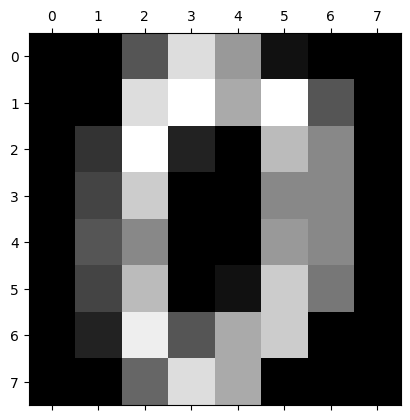

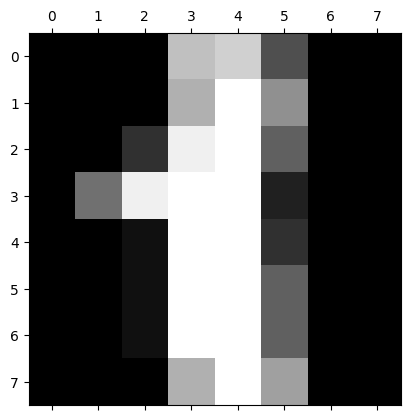

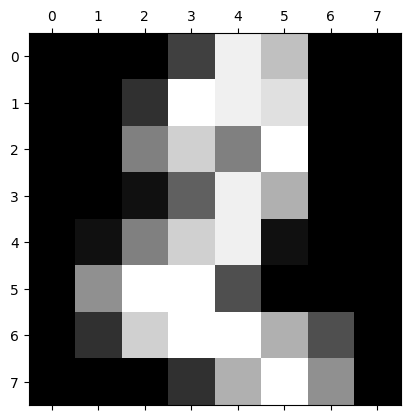

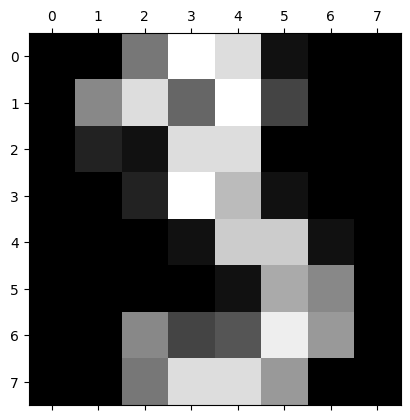

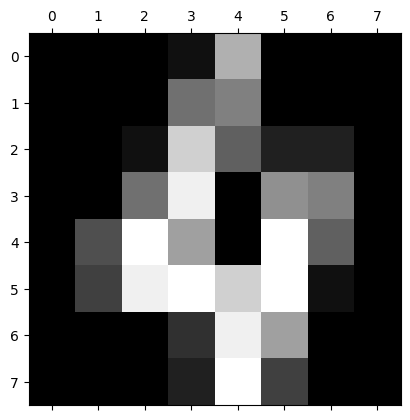

In [7]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [8]:
digits.target[:11]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [9]:
x = digits.data

In [10]:
y = digits.target

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [12]:
model = LogisticRegression(max_iter=200)
model

LogisticRegression(max_iter=200)

In [13]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [14]:
model.predict(x_test)

array([4, 5, 9, 1, 0, 8, 8, 4, 6, 9, 0, 1, 7, 0, 2, 0, 4, 2, 6, 7, 8, 7,
       1, 1, 7, 9, 0, 0, 6, 4, 2, 8, 5, 4, 2, 5, 3, 6, 2, 7, 0, 6, 9, 0,
       5, 8, 0, 9, 8, 6, 9, 9, 5, 3, 1, 7, 0, 1, 9, 6, 6, 3, 4, 3, 3, 6,
       3, 9, 9, 7, 7, 9, 1, 0, 6, 3, 3, 6, 7, 6, 3, 9, 8, 9, 6, 3, 2, 4,
       4, 7, 5, 9, 0, 8, 1, 9, 4, 7, 2, 5, 3, 1, 8, 7, 9, 5, 0, 6, 2, 4,
       9, 6, 2, 4, 4, 6, 8, 1, 4, 1, 6, 2, 9, 5, 7, 1, 1, 3, 4, 3, 5, 9,
       7, 3, 0, 7, 3, 7, 6, 1, 5, 9, 1, 0, 3, 6, 2, 0, 5, 1, 1, 7, 4, 3,
       3, 2, 3, 2, 2, 3, 0, 3, 2, 0, 9, 1, 6, 6, 1, 5, 1, 7, 9, 8, 5, 5,
       2, 2, 3, 6, 5, 5, 4, 8, 9, 9, 0, 1, 7, 0, 2, 1, 5, 5, 1, 2, 5, 0,
       2, 0, 8, 0, 2, 5, 7, 1, 6, 5, 8, 6, 4, 6, 7, 9, 4, 0, 8, 1, 8, 9,
       1, 5, 5, 0, 7, 4, 1, 7, 7, 6, 6, 1, 5, 4, 0, 0, 0, 9, 7, 1, 6, 7,
       5, 2, 4, 3, 9, 7, 3, 2, 7, 3, 0, 9, 2, 6, 3, 0, 1, 4, 4, 1, 4, 0,
       3, 7, 3, 5, 2, 8, 0, 4, 2, 9, 7, 7, 7, 1, 8, 0, 0, 8, 3, 5, 7, 0,
       6, 5, 0, 4, 5, 4, 3, 5, 2, 6, 7, 4, 9, 1, 4,

In [15]:
model.score(x_test,y_test)

0.9833333333333333

In [16]:
y_predicted = model.predict(x_test)

In [17]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  1],
       [ 0,  0,  1,  0,  1,  0,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 35]])

Text(120.72222222222221, 0.5, 'Actual')

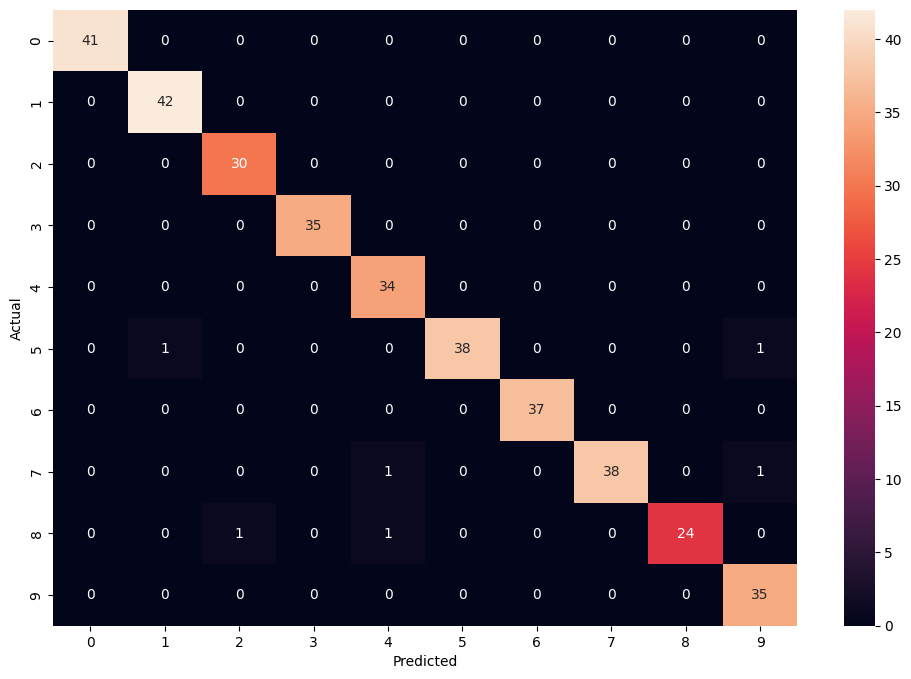

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')